In [54]:
import math
%matplotlib notebook
# Setting up the problem
# G = 6.6743e-11
# m1 = 10e24
# m2 = 2e30
# mu = m1
# k = G*m1*m2
# l = 2.7e40
# r = 147.1e9
# r_dot = 30.29e3

G = 1
m1 = 1
m2 = 100
mu = m1
k = G*m1*m2
l = 10
r = 1
r_dot = 9

In [55]:
def RungeKutta4(g,f,x0,y0,z0,xend,h):
    x = x0
    y = y0
    z = z0
    output_data = []
    input_data = []
    derivative_data = []
    while (x<xend):
        output_data.append(y)
        input_data.append(x)
        derivative_data.append(z)
        k0 = h*f(x,y,z)
        l0 = h*g(x,y,z)
        k1 = h*f(x+h/2,y+k0/2,z+l0/2)
        l1 = h*g(x+h/2,y+k0/2,z+l0/2)
        k2 = h*f(x+h/2,y+k1/2,z+l1/2)
        l2 = h*g(x+h/2,y+k1/2,z+l1/2)
        k3 = h*f(x+h,y+k2,z+l2)
        l3 = h*g(x+h,y+k2,z+l2)
        y+=(k0+2*k1+2*k2+k3)/6
        z+=(l0+2*l1+2*l2+l3)/6
        x+=h
    return derivative_data,input_data,output_data

In [56]:
h = 0.01
def g(x,y,z):
    return (l**2/mu**2)/(y**3)- (k/mu)/(y**2)
def f(x,y,z):
    return z
derivative_data,input_data,output_data = RungeKutta4(g,f,0,r,r_dot,10,h)
def func_theta(r):
    return l/mu/(r**2)
theta_out = []
theta_out.append(func_theta(output_data[0]))
for i in range(1,len(output_data)):
    theta_out.append(h*func_theta(output_data[i-1])+theta_out[i-1])

<IPython.core.display.Javascript object>


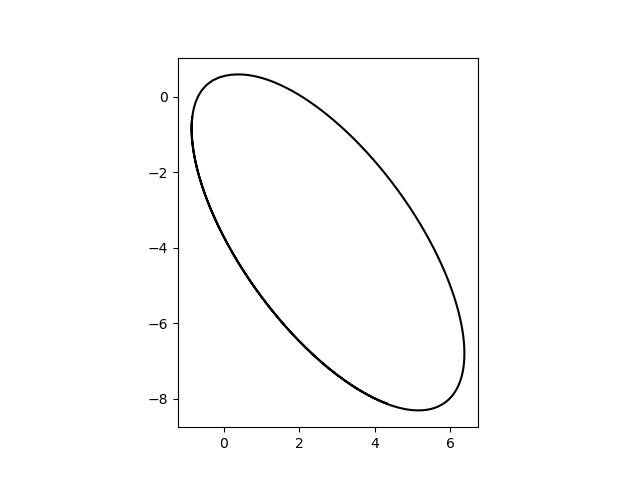

In [57]:
def x(r,theta):
    return r*math.cos(theta)
def y(r,theta):
    return r*math.sin(theta)
x_out = []
y_out = []
for i in range(0,len(output_data)):
    x_out.append(x(output_data[i],theta_out[i]))
    y_out.append(y(output_data[i],theta_out[i]))
plt.plot(x_out,y_out,'k-')
plt.gca().set_aspect('equal')

<IPython.core.display.Javascript object>


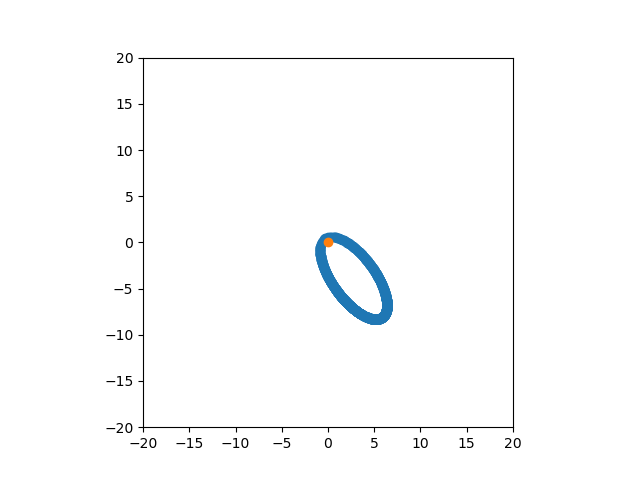

In [58]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-20, 20), ylim=(-20, 20))
line, = ax.plot([], [],'o-', lw=1)
line2, = ax.plot([],[],'o-',lw=1)
j = 0
x_out_plot = []
y_out_plot = []

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data(0,0)
    x_out_plot.clear()
    y_out_plot.clear()
    j = 0
    return line,

# animation function.  This is called sequentially
def animate(i):
    global j
    x_out_plot.append(x_out[j])
    y_out_plot.append(y_out[j])
    line.set_data(x_out_plot[-1],y_out_plot[-1])
    j+=1
    return line,

from time import time
t0 = time()
animate(0)
t1 = time()
interval = 1000 * h - (t1 - t0)

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,frames=300, interval=interval, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('basic_animation.mp4', fps=3, extra_args=['-vcodec', 'libx264'])

plt.show()